In [10]:
import dill
dill.dump_session("EXP6.db")

In [5]:
import dill
dill.load_session("EXP6.db")

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



In [2]:
from keras.models import Sequential
from keras.layers import Conv1D, ConvLSTM2D, MaxPooling1D, Flatten, Dense, Reshape,TimeDistributed,Conv2D,BatchNormalization,MaxPooling2D,ConvLSTM1D,LSTM



In [3]:
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


In [4]:
# Read CSV File
df = pd.read_csv(r"C:\Users\mujta\OneDrive\Documents\GitHub\F20PA-DriverDrowsinessDetection\Experiments\mergedEMYA_min_max_normEMYA.csv")

In [5]:
df.drop(columns=["Unnamed: 0","Part_ID"],inplace=True)

In [6]:
df

,Label,EAR,MAR,MOE,Angle
0,0,0.695510,0.616864,0.391060,0.531289
1,0,0.710750,0.609890,0.380033,0.573746
2,0,0.700934,0.642625,0.404756,0.598722
3,0,0.759520,0.620259,0.365998,0.597107
4,0,0.707608,0.535723,0.335285,0.558230
...,...,...,...,...,...
422995,10,0.502563,0.621765,0.360100,0.627546
422996,10,0.471807,0.654889,0.392917,0.601479
422997,10,0.543209,0.610680,0.328816,0.636785
422998,10,0.573772,0.636166,0.316251,0.573157


In [7]:
int(df.shape[0]/5)

84600

In [8]:

from sklearn.metrics import precision_recall_fscore_support
# Function to get precision, recall, and F1 scores
def getPerformanceMetrics(model,X_test,y_test):

    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Compute precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test.flatten(), y_pred, average=None)
    # Lists of precision , recall, and F1 scores
    p_list = []
    r_list = []
    f_list = []
    # Print precision, recall, and F1 score for each class
    for i in range(len(precision)):
        p_list.append(precision[i])
        r_list.append(recall[i])
        f_list.append(f1[i])
        print(f"Class {i}:")
        print(f"  Precision: {precision[i]}")
        print(f"  Recall: {recall[i]}")
        print(f"  F1 Score: {f1[i]}")
    # Print Average values
    print(f"Avg Precision:{np.average(p_list)}")
    print(f"Avg Recall:{np.average(r_list)}")
    print(f"Avg F1 Score:{np.average(f_list)}")


In [9]:
# Function to set parameters and train model.
# Returns model, and test sets.
def compileModel(data,timestep,test_size,num_epochs):
    # Separate labels
    y=data["Label"]
    data = data.drop(columns=['Label'])
    # Reshape according to timestep
    df_reshaped = np.array(data).reshape(int(data.shape[0]/timestep),timestep,3)
    y = np.array(y)
    y_reshaped  = []
    for i in range(0, len(y), timestep):
        y_reshaped.append([y[i]])
    # Create test and  train sets.
    X_train, X_test, y_train, y_test = train_test_split(df_reshaped, y_reshaped, test_size=test_size, random_state=42)

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train= np.array(y_train)
    y_test = np.array(y_test)
    # Set labels as  0,1,2
    for i in range(0,len(y_train)):
        y_train[i]=int(y_train[i]/5)
    for i in range(0,len(y_test)):
        y_test[i]=int(y_test[i]/5)
    # Define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timestep, 3)))
    model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(64, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))  

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Accuracy:", accuracy)
    getPerformanceMetrics(model,X_test,y_test)
    return model, X_test, y_test






## Increase timestep 5,10,20

In [10]:
modelA , X_testA, y_testA = compileModel(data=df,
                                         timestep=5,
                                         test_size=0.2,
                                         num_epochs=50)




Epoch 1/50


1692/1692 [==============================] - 10s 4ms/step - loss: 1.0462 - accuracy: 0.4395 - val_loss: 1.0148 - val_accuracy: 0.4826
Epoch 2/50
1692/1692 [==============================] - 6s 4ms/step - loss: 0.9952 - accuracy: 0.4983 - val_loss: 0.9642 - val_accuracy: 0.5251
Epoch 3/50
1692/1692 [==============================] - 6s 4ms/step - loss: 0.9437 - accuracy: 0.5425 - val_loss: 0.9168 - val_accuracy: 0.5740
Epoch 4/50
1692/1692 [==============================] - 6s 4ms/step - loss: 0.8991 - accuracy: 0.5780 - val_loss: 0.8730 - val_accuracy: 0.6005
Epoch 5/50
1692/1692 [==============================] - 6s 3ms/step - loss: 0.8565 - accuracy: 0.6111 - val_loss: 0.8282 - val_accuracy: 0.6190
Epoch 6/50
1692/1692 [==============================] - 6s 3ms/step - loss: 0.8207 - accuracy: 0.6340 - val_loss: 0.8068 - val_accuracy: 0.6442
Epoch 7/50
1692/1692 [==============================] - 6s 4ms/step - loss: 0.7878 - accuracy: 0.6527 - val_loss: 0.7700 - val_acc

In [11]:
modelA.save("modelA.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
modelB , X_testB, y_testB = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.2,
                                         num_epochs=50)

Epoch 1/50
846/846 [==============================] - 11s 8ms/step - loss: 1.0413 - accuracy: 0.4405 - val_loss: 1.0106 - val_accuracy: 0.4626
Epoch 2/50
846/846 [==============================] - 5s 6ms/step - loss: 0.9799 - accuracy: 0.5089 - val_loss: 0.9671 - val_accuracy: 0.5179
Epoch 3/50
846/846 [==============================] - 6s 7ms/step - loss: 0.9427 - accuracy: 0.5400 - val_loss: 0.9332 - val_accuracy: 0.5489
Epoch 4/50
846/846 [==============================] - 6s 7ms/step - loss: 0.9122 - accuracy: 0.5597 - val_loss: 0.9254 - val_accuracy: 0.5452
Epoch 5/50
846/846 [==============================] - 5s 6ms/step - loss: 0.8726 - accuracy: 0.5896 - val_loss: 0.8673 - val_accuracy: 0.5922
Epoch 6/50
846/846 [==============================] - 5s 6ms/step - loss: 0.8323 - accuracy: 0.6139 - val_loss: 0.8311 - val_accuracy: 0.6138
Epoch 7/50
846/846 [==============================] - 5s 6ms/step - loss: 0.7951 - accuracy: 0.6419 - val_loss: 0.7882 - val_accuracy: 0.6497
Epoch

In [13]:
modelB.save("modelB.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
modelC , X_testC, y_testC = compileModel(data=df,
                                         timestep=20,
                                         test_size=0.2,
                                         num_epochs=50)

Epoch 1/50
423/423 [==============================] - 9s 11ms/step - loss: 1.0510 - accuracy: 0.4302 - val_loss: 1.0306 - val_accuracy: 0.4687
Epoch 2/50
423/423 [==============================] - 4s 8ms/step - loss: 1.0161 - accuracy: 0.4685 - val_loss: 0.9903 - val_accuracy: 0.4967
Epoch 3/50
423/423 [==============================] - 3s 8ms/step - loss: 0.9787 - accuracy: 0.5126 - val_loss: 0.9927 - val_accuracy: 0.5151
Epoch 4/50
423/423 [==============================] - 4s 8ms/step - loss: 0.9477 - accuracy: 0.5313 - val_loss: 0.9182 - val_accuracy: 0.5561
Epoch 5/50
423/423 [==============================] - 3s 8ms/step - loss: 0.9058 - accuracy: 0.5615 - val_loss: 0.9083 - val_accuracy: 0.5437
Epoch 6/50
423/423 [==============================] - 3s 8ms/step - loss: 0.8793 - accuracy: 0.5726 - val_loss: 0.8717 - val_accuracy: 0.5940
Epoch 7/50
423/423 [==============================] - 3s 8ms/step - loss: 0.8481 - accuracy: 0.5986 - val_loss: 0.8639 - val_accuracy: 0.6002
Epoch

In [15]:
modelC.save("modelC.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Since Model B has best performance use that to experiment with num epochs

In [16]:
modelD , X_testD, y_testD = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.2,
                                         num_epochs=75)

Epoch 1/75
846/846 [==============================] - 8s 6ms/step - loss: 1.0493 - accuracy: 0.4274 - val_loss: 1.0173 - val_accuracy: 0.4591
Epoch 2/75
846/846 [==============================] - 4s 5ms/step - loss: 0.9940 - accuracy: 0.4873 - val_loss: 0.9728 - val_accuracy: 0.5052
Epoch 3/75
846/846 [==============================] - 4s 5ms/step - loss: 0.9491 - accuracy: 0.5327 - val_loss: 0.9334 - val_accuracy: 0.5440
Epoch 4/75
846/846 [==============================] - 4s 5ms/step - loss: 0.9114 - accuracy: 0.5631 - val_loss: 0.9237 - val_accuracy: 0.5491
Epoch 5/75
846/846 [==============================] - 4s 5ms/step - loss: 0.8712 - accuracy: 0.5925 - val_loss: 0.8865 - val_accuracy: 0.5773
Epoch 6/75
846/846 [==============================] - 4s 5ms/step - loss: 0.8324 - accuracy: 0.6195 - val_loss: 0.8279 - val_accuracy: 0.6191
Epoch 7/75
846/846 [==============================] - 4s 5ms/step - loss: 0.7942 - accuracy: 0.6425 - val_loss: 0.8075 - val_accuracy: 0.6386
Epoch 

In [17]:
modelD.save("modelD.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
modelE , X_testE, y_testE = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.2,
                                         num_epochs=100)

Epoch 1/100
846/846 [==============================] - 5s 4ms/step - loss: 1.0474 - accuracy: 0.4324 - val_loss: 1.0155 - val_accuracy: 0.4542
Epoch 2/100
846/846 [==============================] - 3s 4ms/step - loss: 0.9893 - accuracy: 0.4952 - val_loss: 0.9703 - val_accuracy: 0.5102
Epoch 3/100
846/846 [==============================] - 3s 4ms/step - loss: 0.9447 - accuracy: 0.5362 - val_loss: 0.9246 - val_accuracy: 0.5470
Epoch 4/100
846/846 [==============================] - 3s 4ms/step - loss: 0.9020 - accuracy: 0.5676 - val_loss: 0.8958 - val_accuracy: 0.5745
Epoch 5/100
846/846 [==============================] - 3s 4ms/step - loss: 0.8542 - accuracy: 0.6018 - val_loss: 0.8603 - val_accuracy: 0.5928
Epoch 6/100
846/846 [==============================] - 3s 4ms/step - loss: 0.8081 - accuracy: 0.6337 - val_loss: 0.8143 - val_accuracy: 0.6226
Epoch 7/100
846/846 [==============================] - 3s 4ms/step - loss: 0.7717 - accuracy: 0.6562 - val_loss: 0.7837 - val_accuracy: 0.6510

In [19]:
modelE.save("modelE.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Use best performance and experiment with test size

### 70-30 split

In [29]:
modelF , X_testF, y_testF = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.3,
                                         num_epochs=100)

Epoch 1/100
741/741 [==============================] - 5s 4ms/step - loss: 1.0528 - accuracy: 0.4306 - val_loss: 1.0251 - val_accuracy: 0.4576
Epoch 2/100
741/741 [==============================] - 3s 4ms/step - loss: 1.0149 - accuracy: 0.4720 - val_loss: 0.9839 - val_accuracy: 0.4986
Epoch 3/100
741/741 [==============================] - 3s 4ms/step - loss: 0.9789 - accuracy: 0.5160 - val_loss: 0.9696 - val_accuracy: 0.5339
Epoch 4/100
741/741 [==============================] - 3s 5ms/step - loss: 0.9428 - accuracy: 0.5357 - val_loss: 0.9353 - val_accuracy: 0.5490
Epoch 5/100
741/741 [==============================] - 3s 5ms/step - loss: 0.9143 - accuracy: 0.5602 - val_loss: 0.8929 - val_accuracy: 0.5782
Epoch 6/100
741/741 [==============================] - 3s 5ms/step - loss: 0.8741 - accuracy: 0.5878 - val_loss: 0.8749 - val_accuracy: 0.5893
Epoch 7/100
741/741 [==============================] - 3s 4ms/step - loss: 0.8384 - accuracy: 0.6135 - val_loss: 0.8223 - val_accuracy: 0.6292

In [30]:
modelF.save("modelF.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 50-50 split

In [31]:
modelG , X_testG, y_testG = compileModel(data=df,
                                         timestep=10,
                                         test_size=0.5,
                                         num_epochs=100)

Epoch 1/100
529/529 [==============================] - 5s 5ms/step - loss: 1.0627 - accuracy: 0.4159 - val_loss: 1.0433 - val_accuracy: 0.4187
Epoch 2/100
529/529 [==============================] - 2s 4ms/step - loss: 1.0232 - accuracy: 0.4568 - val_loss: 1.0140 - val_accuracy: 0.4832
Epoch 3/100
529/529 [==============================] - 2s 4ms/step - loss: 0.9797 - accuracy: 0.5046 - val_loss: 0.9644 - val_accuracy: 0.5130
Epoch 4/100
529/529 [==============================] - 2s 4ms/step - loss: 0.9514 - accuracy: 0.5226 - val_loss: 0.9655 - val_accuracy: 0.5251
Epoch 5/100
529/529 [==============================] - 2s 4ms/step - loss: 0.9276 - accuracy: 0.5440 - val_loss: 0.9229 - val_accuracy: 0.5605
Epoch 6/100
529/529 [==============================] - 2s 4ms/step - loss: 0.9066 - accuracy: 0.5633 - val_loss: 0.8934 - val_accuracy: 0.5832
Epoch 7/100
529/529 [==============================] - 2s 4ms/step - loss: 0.8828 - accuracy: 0.5773 - val_loss: 0.8794 - val_accuracy: 0.5894

In [32]:
modelG.save("modelG.h5")

c:\Users\mujta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,precision_recall_fscore_support
# Function to get plot confusion matrix along with other metrics
def getMetrics(model,X_test,y_test):
    # Get test results
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    conf_mat = confusion_matrix(y_test.flatten(), y_pred)
    
    # Convert instances into percentages.
    confm_percent = conf_mat.astype('float') / conf_mat.sum(axis=1).reshape(-1, 1)
    print(confm_percent)
    # Round values to 2 places
    for i in range(0,3):
        for j in range(0,3):
            confm_percent[i][j] = round(confm_percent[i][j],2)
    # Plot the confusion matrix for the results
    plt.figure(figsize=(8, 6))
    sns.heatmap(confm_percent, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute precision, recall, and F1 score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test.flatten(), y_pred, average=None)

    # Print precision, recall, and F1 score for each class
    for i in range(len(precision)):
        print(f"Class {i}:")
        print(f"  Precision: {precision[i]}")
        print(f"  Recall: {recall[i]}")
        print(f"  F1 Score: {f1[i]}")


  1/265 [..............................] - ETA: 6s

265/265 [==============================] - 1s 2ms/step


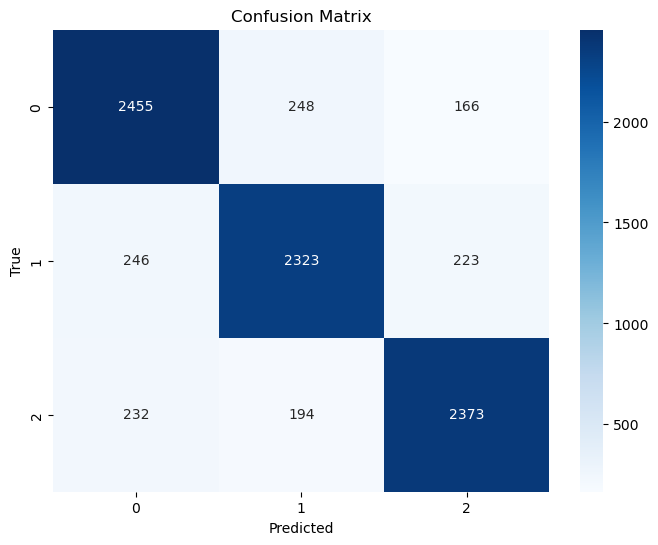

Class 0:
  Precision: 0.8370269348789635
  Recall: 0.8556988497734402
  F1 Score: 0.8462599103757326
Class 1:
  Precision: 0.8401446654611212
  Recall: 0.8320200573065902
  F1 Score: 0.8360626237178334
Class 2:
  Precision: 0.8591600289645185
  Recall: 0.8478027867095391
  F1 Score: 0.8534436252472577


In [34]:
getMetrics(model=modelD,
           X_test=X_testD,
           y_test=y_testD)

661/661 [==============================] - 1s 2ms/step


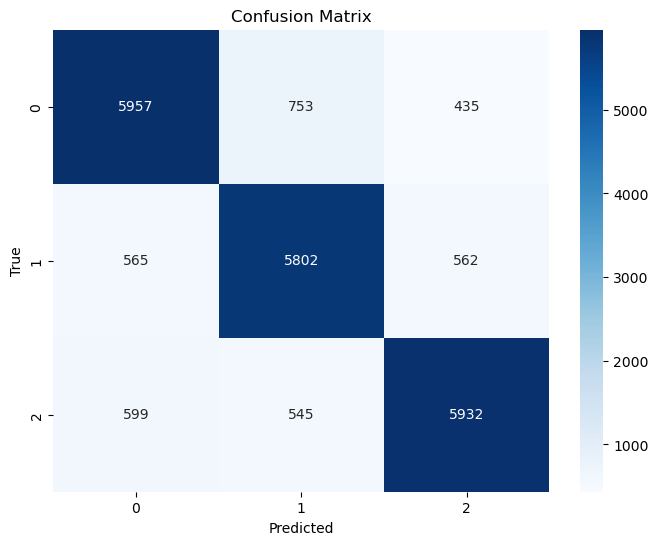

Class 0:
  Precision: 0.836539811824182
  Recall: 0.8337298810356893
  F1 Score: 0.8351324828263004
Class 1:
  Precision: 0.8171830985915493
  Recall: 0.8373502669937942
  F1 Score: 0.827143773611804
Class 2:
  Precision: 0.8561119930725934
  Recall: 0.8383267382702092
  F1 Score: 0.847126026419136


In [35]:
getMetrics(model=modelG,
           X_test=X_testG,
           y_test=y_testG)

397/397 [==============================] - 1s 2ms/step


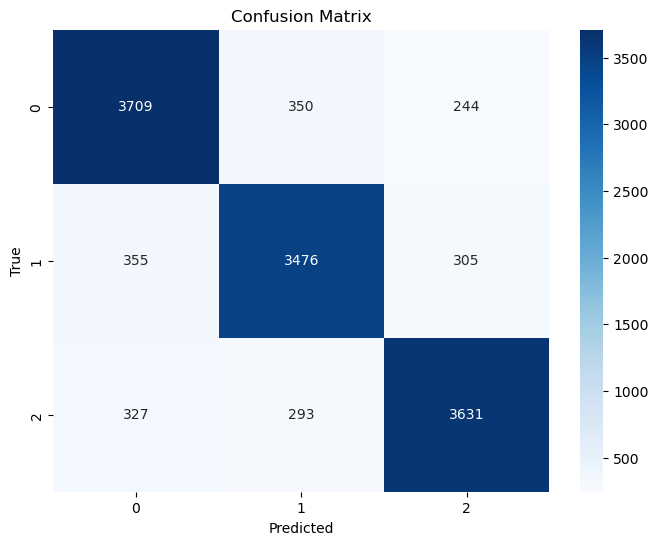

Class 0:
  Precision: 0.8446823047141881
  Recall: 0.8619567743434813
  F1 Score: 0.8532321141016794
Class 1:
  Precision: 0.8438941490653071
  Recall: 0.8404255319148937
  F1 Score: 0.8421562689279225
Class 2:
  Precision: 0.8686602870813397
  Recall: 0.8541519642437073
  F1 Score: 0.861345036176017


In [36]:
getMetrics(model=modelF,
           X_test=X_testF,
           y_test=y_testF)

265/265 [==============================] - 1s 2ms/step
[[0.88218892 0.06343674 0.05437435]
 [0.09706304 0.82557307 0.0773639 ]
 [0.08074312 0.06538049 0.85387638]]


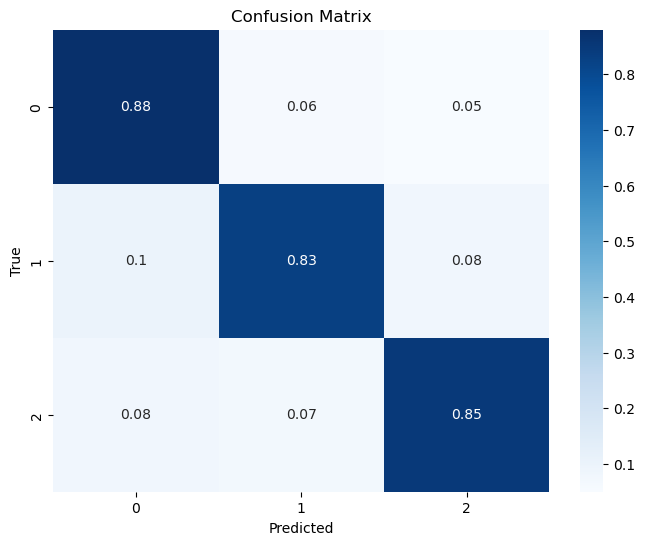

Class 0:
  Precision: 0.8358652575957728
  Recall: 0.8821889159986058
  F1 Score: 0.8584025775818213
Class 1:
  Precision: 0.8632958801498127
  Recall: 0.8255730659025788
  F1 Score: 0.844013181984621
Class 2:
  Precision: 0.8653149891383056
  Recall: 0.8538763844230082
  F1 Score: 0.8595576335191512


In [16]:
getMetrics(model=modelE,
           X_test=X_testE,
           y_test=y_testE)